# <span style="color:black">Supermarket marketing campaign Case Study</span>.

### Session Agenda 
* Understand the basic concepts of Hyperparameter tuning and pipelines
* Learn how to use RandomisedCV for model tuning, to reduce the time-complexity involved in Grid Search CV
* Learn feature importance using a new package called “SHAP” to make the model more interpretable. 
* Understand how pipeline with column transformer can help standardize the model building process
* Learn about industrial applications of these techniques

###  Context 

'All You Need' Supermarket is planning for the year-end sale.
They want to launch a new offer - gold membership for only \\$499 which is \\$999 on normal days(that gives a 20% discount on all purchases).

It will be valid only for existing customers, they are planning to start a campaign through phone calls.

The best way to reduce the cost of the campaign is to make a predictive model which will classify customers who might purchase the offer, using the data they gathered during last year’s campaign.

We will build a model for classifying whether customers will reply with a positive response or not.


So far we have used various machine learning algorithms to make predictive models. In this session, we would go a little deeper and understand how we can improve the model performance by tuning certain hyperparameters. After building an Ml model, we will identify the contribution of each factor in making predictions. And finally, we will learn how to standardize the ml models using a pipeline. 
Let's list out a few objectives for the case study. 

###  Objective 
- Identify different factors that impacts the response of the customers. 
- Improve the model performance using hyperparameter tuning. 
- Build pipeline to standardize the training process. 

### Data Description 

- Response (target) - 1 if customer accepted the offer in the last campaign, 0 otherwise
- ID - Unique ID of each customer
- Year_Birth - Age of the customer
- Complain - 1 if the customer complained in the last 2 years
- Dt_Customer - date of customer's enrollment with the company
- Education - customer's level of education
- Marital - customer's marital status
- Kidhome - number of small children in customer's household
- Teenhome - number of teenagers in customer's household
- Income - customer's yearly household income
- MntFishProducts - the amount spent on fish products in the last 2 years
- MntMeatProducts - the amount spent on meat products in the last 2 years
- MntFruits - the amount spent on fruits products in the last 2 years
- MntSweetProducts - amount spent on sweet products in the last 2 years
- MntWines - the amount spent on wine products in the last 2 years
- MntGoldProds - the amount spent on gold products in the last 2 years
- NumDealsPurchases - number of purchases made with discount
- NumCatalogPurchases - number of purchases made using catalog (buying goods to be shipped through the mail)
- NumStorePurchases - number of purchases made directly in stores
- NumWebPurchases - number of purchases made through the company's website
- NumWebVisitsMonth - number of visits to company's website in the last month
- Recency - number of days since the last purchase

Sklearn provides various libraries to build models and assess the performance. Let's import the packages

###  Importing Libraries 

In [3]:
# To help with reading and manipulating data
import pandas as pd
import numpy as np

# To help with data visualization
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# To be used for missing value imputation
from sklearn.impute import SimpleImputer

# To help with model building
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from xgboost import XGBClassifier

# To get different metric scores, and split data
from sklearn import metrics
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
)

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder


# To be used for tuning the model
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# To be used for creating pipelines and personalizing them
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To supress warnings
import warnings

warnings.filterwarnings("ignore")

# This will help in making the Python code more structured automatically (good coding practice)
%load_ext nb_black

The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black


<IPython.core.display.Javascript object>

###   Read the dataset 

In [5]:
jmd = pd.read_csv("Cardiac.csv")

<IPython.core.display.Javascript object>

###    Data Overview 

In [6]:
# let's create a copy of the data
data = jmd.copy()

<IPython.core.display.Javascript object>

In [7]:
# let's view the first 5 rows of the data
data.head()

,Gender,Chain_smoker,Consumes_other_tobacco_products,HighBP,Obese,Diabetes,Metabolic_syndrome,Use_of_stimulant_drugs,Family_history,History_of_preeclampsia,CABG_history,Respiratory_illness,UnderRisk
0,Male,1,1,0,1,0,0,0,1,0,0,0,no
1,Male,0,1,0,1,0,0,0,1,0,0,0,no
2,Male,0,1,0,1,0,0,0,1,0,0,0,no
3,Male,0,1,0,1,0,0,0,1,0,0,0,no
4,Male,0,0,0,0,0,1,1,0,0,0,0,no


<IPython.core.display.Javascript object>

###     Printing the information 

In [8]:
# let's check the data types of the columns in the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Gender                           889 non-null    object
 1   Chain_smoker                     889 non-null    int64 
 2   Consumes_other_tobacco_products  889 non-null    int64 
 3   HighBP                           889 non-null    int64 
 4   Obese                            889 non-null    int64 
 5   Diabetes                         889 non-null    int64 
 6   Metabolic_syndrome               889 non-null    int64 
 7   Use_of_stimulant_drugs           889 non-null    int64 
 8   Family_history                   889 non-null    int64 
 9   History_of_preeclampsia          889 non-null    int64 
 10  CABG_history                     889 non-null    int64 
 11  Respiratory_illness              889 non-null    int64 
 12  UnderRisk                        889

<IPython.core.display.Javascript object>

####  Let's check for duplicate values 

In [9]:
data.duplicated().sum()

789

<IPython.core.display.Javascript object>

####   Let's check for percentage of missing values 

In [10]:
round(data.isnull().sum() / data.isnull().count() * 100, 2)

Gender                            0.000
Chain_smoker                      0.000
Consumes_other_tobacco_products   0.000
HighBP                            0.000
Obese                             0.000
Diabetes                          0.000
Metabolic_syndrome                0.000
Use_of_stimulant_drugs            0.000
Family_history                    0.000
History_of_preeclampsia           0.000
CABG_history                      0.000
Respiratory_illness               0.000
UnderRisk                         0.000
dtype: float64

<IPython.core.display.Javascript object>

###  Statistical summary 

In [11]:
# let's view the statistical summary of the numerical columns in the data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Chain_smoker,889.000,0.120,0.326,0.000,0.000,0.000,0.000,1.000
Consumes_other_tobacco_products,889.000,0.838,0.369,0.000,1.000,1.000,1.000,1.000
HighBP,889.000,0.087,0.281,0.000,0.000,0.000,0.000,1.000
Obese,889.000,0.919,0.273,0.000,1.000,1.000,1.000,1.000
Diabetes,889.000,0.055,0.228,0.000,0.000,0.000,0.000,1.000
Metabolic_syndrome,889.000,0.043,0.202,0.000,0.000,0.000,0.000,1.000
Use_of_stimulant_drugs,889.000,0.082,0.275,0.000,0.000,0.000,0.000,1.000
Family_history,889.000,0.926,0.262,0.000,1.000,1.000,1.000,1.000
History_of_preeclampsia,889.000,0.018,0.133,0.000,0.000,0.000,0.000,1.000
CABG_history,889.000,0.021,0.145,0.000,0.000,0.000,0.000,1.000


<IPython.core.display.Javascript object>

In [24]:
# let's view the statistical summary of the non-numerical columns in the data
data.describe(
    exclude=np.number
).T  ## Let's create a list of numerical and categorical columns
catcols = ["Gender", "UnderRisk"]
# numcols =
numcols = list(set(data.columns.to_list()) - set(catcols))

<IPython.core.display.Javascript object>

In [27]:
# printing the number of occurrences of each unique value in each categorical column
for column in catcols:
    print(data[column].value_counts())
    print("-" * 50)

Male      607
Female    256
Other      26
Name: Gender, dtype: int64
--------------------------------------------------
no     699
yes    190
Name: UnderRisk, dtype: int64
--------------------------------------------------


<IPython.core.display.Javascript object>

###   Univariate EDA on Numerical variables  

In [29]:
data1 = data.copy()

<IPython.core.display.Javascript object>

**Separating target variable and other variables**

In [34]:
X = data1.drop(columns="UnderRisk")
X = pd.get_dummies(X)

Y = data1["UnderRisk"].apply(lambda x: 1 if x == "yes" else 0)

<IPython.core.display.Javascript object>

**Splitting the data into train/test**

**Note:** We will split the data into train and test as data size is very small to create validation set as well. We will be using stratified sampling technique to ensure that relative class frequencies are approximately preserved in each train and validation fold.

In [31]:
# Splitting data into training, validation and test set:
# first we split data into 2 parts, say temporary and test

X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.3, random_state=1, stratify=Y
)

print(X_train.shape, X_test.shape)

(622, 14) (267, 14)


<IPython.core.display.Javascript object>

In [35]:
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)
print(X_train.shape, X_test.shape)

ValueError: Data must be 1-dimensional

<IPython.core.display.Javascript object>

In [32]:
imputer = SimpleImputer(strategy="median")
impute = imputer.fit(X_train)

X_train = impute.transform(X_train)
X_test = imputer.transform(X_test)

<IPython.core.display.Javascript object>

###  Building the model 

### Model evaluation criterion:

#### Model can make wrong predictions as:
1. Predicting a customer will buy the product and the customer doesn't buy - Loss of resources
2. Predicting a customer will not buy the product and the customer buys - Loss of opportunity

#### Which case is more important? 
* Predicting that customer will not buy the product but he buys i.e. losing on a potential source of income for the company because that customer will not be targeted by the marketing team when he should be targeted.

#### How to reduce this loss i.e need to reduce False Negatives?
* Company wants Recall to be maximized, greater the Recall lesser the chances of false negatives.

**Let's start by building different models using KFold and cross_val_score and tune the best model using GridSearchCV and RandomizedSearchCV**

- `Stratified K-Folds cross-validation` provides dataset indices to split data into train/validation sets. Split dataset into k consecutive folds (without shuffling by default) keeping the distribution of both classes in each fold the same as the target variable. Each fold is then used once as validation while the k - 1 remaining folds form the training set.

In [33]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))

results = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models


# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation Performance:" "\n")

for name, model in models:
    scoring = "recall"
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train, y=y_train, scoring=scoring, cv=kfold
    )
    results.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean() * 100))

print("\n" "Training Performance:" "\n")

for name, model in models:
    model.fit(X_train, y_train)
    scores = recall_score(y_train, model.predict(X_train)) * 100
    print("{}: {}".format(name, scores))


Cross-Validation Performance:

Bagging: nan
Random forest: nan
GBM: nan
Adaboost: nan
Xgboost: nan

Training Performance:



ValueError: pos_label=1 is not a valid label. It should be one of ['no', 'yes']

<IPython.core.display.Javascript object>

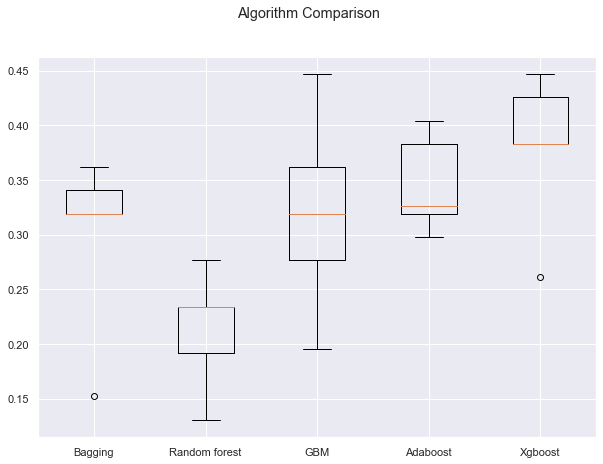

<IPython.core.display.Javascript object>

In [31]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results)
ax.set_xticklabels(names)

plt.show()

- We can see that XGBoost is giving the highest cross-validated recall followed by Adaboost
- The boxplot shows that the performance of Adaboost is consistent with no outlier
- We will tune - Adaboost and XGBoost and see if the performance improves. 

###  Hyperparameter Tuning 

* We will tune Adaboost and xgboost models using GridSearchCV and RandomizedSearchCV. We will also compare the performance and time taken by these two methods - grid search and randomized search.

**First, let's create two functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.**

The following model performance classification function will return the accuracy, recall, precision and F1 score. 

In [32]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

<IPython.core.display.Javascript object>

The following function will return the confusion matrix for a model

In [33]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

<IPython.core.display.Javascript object>

##   Adaboost 

Let's tune Adaboost model using **GridSearch**

We define certain hyperparameters in the grid and GridSearchCV build model using every possible combination of the hyperparameters defined in the grid and it returns the best combination of the hyperparameters. Grid Search is usually computationally expensive. 

**Grid Search**

In [34]:
%%time 

# defining model
model = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in GridSearchCV

param_grid = {
    "n_estimators": np.arange(10, 110, 10),
    "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1),
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Calling GridSearchCV
grid_cv = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scorer, cv=5, n_jobs = -1)

# Fitting parameters in GridSearchCV
grid_cv.fit(X_train, y_train)

print(
    "Best Parameters:{} \nScore: {}".format(grid_cv.best_params_, grid_cv.best_score_)
)

Best Parameters:{'base_estimator': DecisionTreeClassifier(max_depth=2, random_state=1), 'learning_rate': 1, 'n_estimators': 70} 
Score: 0.4919518963922294
Wall time: 26.1 s


<IPython.core.display.Javascript object>

In [35]:
# building model with best parameters
adb_tuned1 = AdaBoostClassifier(
    n_estimators=70,
    learning_rate=1,
    random_state=1,
    base_estimator=DecisionTreeClassifier(max_depth=2, random_state=1),
)

# Fit the model on training data
adb_tuned1.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2,
                                                         random_state=1),
                   learning_rate=1, n_estimators=70, random_state=1)

<IPython.core.display.Javascript object>

**Checking model performance**

Training performance:
   Accuracy  Recall  Precision    F1
0     0.985   0.932      0.969 0.950
*************************************


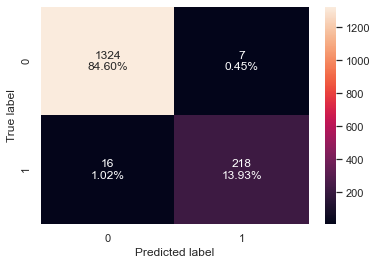

<IPython.core.display.Javascript object>

In [36]:
# Calculating different metrics on train set
Adaboost_grid_train = model_performance_classification_sklearn(
    adb_tuned1, X_train, y_train
)
print("Training performance:")
print(Adaboost_grid_train)

print("*************************************")


# creating confusion matrix
confusion_matrix_sklearn(adb_tuned1, X_train, y_train)

####  Observations 
- On comparing the CV score and the training score, model is overfitting. 
- The validation recall is still less than 50% i.e. the model is not good at identifying potential customers who would take the offer.

**Randomized Search** 

In [37]:
%%time 

# defining model
model = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in GridSearchCV

param_grid = {
    "n_estimators": np.arange(10, 110, 10),
    "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1),
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_jobs = -1, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 90, 'learning_rate': 1, 'base_estimator': DecisionTreeClassifier(max_depth=2, random_state=1)} with CV score=0.466049953746531:
Wall time: 9.82 s


<IPython.core.display.Javascript object>

In [38]:
# building model with best parameters
adb_tuned2 = AdaBoostClassifier(
    n_estimators=90,
    learning_rate=1,
    random_state=1,
    base_estimator=DecisionTreeClassifier(max_depth=2, random_state=1),
)

# Fit the model on training data
adb_tuned2.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2,
                                                         random_state=1),
                   learning_rate=1, n_estimators=90, random_state=1)

<IPython.core.display.Javascript object>

**Checking model performance**

Training performance:
   Accuracy  Recall  Precision    F1
0     0.992   0.979      0.966 0.972
*************************************


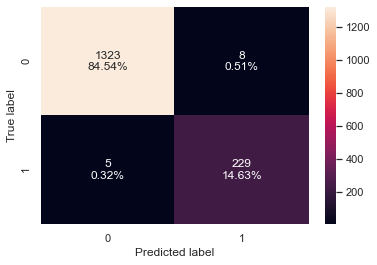

<IPython.core.display.Javascript object>

In [39]:
# Calculating different metrics on train set
Adaboost_random_train = model_performance_classification_sklearn(
    adb_tuned2, X_train, y_train
)
print("Training performance:")
print(Adaboost_random_train)


print("*************************************")

# creating confusion matrix
confusion_matrix_sklearn(adb_tuned2, X_train, y_train)

####  Observations 
- Grid search took a significantly longer time than random search. This difference would further increase as the number of parameters increases. 
- The results from both grid and random search are similar

##   XGBoost 

**Grid Search**

In [40]:
%%time 

#defining model
model = XGBClassifier(random_state=1,eval_metric='logloss')

#Parameter grid to pass in GridSearchCV
param_grid={'n_estimators':np.arange(50,150,50),
            'scale_pos_weight':[2,5,10],
            'learning_rate':[0.01,0.1,0.2,0.05],
            'gamma':[0,1,3,5],
            'subsample':[0.8,0.9,1],
            'max_depth':np.arange(1,5,1),
            'reg_lambda':[5,10]}


# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling GridSearchCV
grid_cv = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scorer, cv=5, n_jobs = -1, verbose= 2)

#Fitting parameters in GridSearchCV
grid_cv.fit(X_train,y_train)


print("Best parameters are {} with CV score={}:" .format(grid_cv.best_params_,grid_cv.best_score_))

Fitting 5 folds for each of 2304 candidates, totalling 11520 fits
Best parameters are {'gamma': 0, 'learning_rate': 0.1, 'max_depth': 1, 'n_estimators': 50, 'reg_lambda': 5, 'scale_pos_weight': 10, 'subsample': 0.9} with CV score=0.9316373728029603:
Wall time: 7min 55s


<IPython.core.display.Javascript object>

In [41]:
# building model with best parameters
xgb_tuned1 = XGBClassifier(
    random_state=1,
    n_estimators=50,
    scale_pos_weight=10,
    subsample=0.9,
    learning_rate=0.1,
    gamma=0,
    eval_metric="logloss",
    reg_lambda=5,
    max_depth=1,
)

# Fit the model on training data
xgb_tuned1.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='logloss', gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=1, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=50, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=1,
              reg_alpha=0, reg_lambda=5, scale_pos_weight=10, subsample=0.9,
              tree_method='exact', validate_parameters=1, verbosity=None)

<IPython.core.display.Javascript object>

**Checking model performance**

Training performance:
   Accuracy  Recall  Precision    F1
0     0.548   0.957      0.243 0.388
*************************************


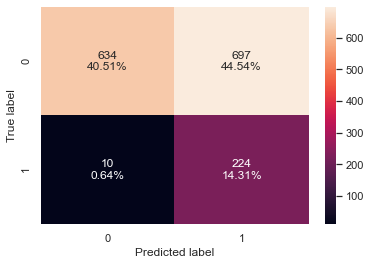

<IPython.core.display.Javascript object>

In [42]:
# Calculating different metrics on train set
xgboost_grid_train = model_performance_classification_sklearn(
    xgb_tuned1, X_train, y_train
)
print("Training performance:")
print(xgboost_grid_train)

print("*************************************")


# creating confusion matrix
confusion_matrix_sklearn(xgb_tuned1, X_train, y_train)

####  Observations 
- The validation recall has increased by >54% as compared to the result from cross-validation with default parameters.
- The model has very low precision score (however low precision shouldn't affect us much here)

**Randomized Search** 

In [43]:
%%time

# defining model
model = XGBClassifier(random_state=1,eval_metric='logloss')

# Parameter grid to pass in RandomizedSearchCV
param_grid={'n_estimators':np.arange(50,150,50),
            'scale_pos_weight':[2,5,10],
            'learning_rate':[0.01,0.1,0.2,0.05],
            'gamma':[0,1,3,5],
            'subsample':[0.8,0.9,1],
            'max_depth':np.arange(1,5,1),
            'reg_lambda':[5,10]}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
xgb_tuned2 = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1, n_jobs = -1)

#Fitting parameters in RandomizedSearchCV
xgb_tuned2.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(xgb_tuned2.best_params_,xgb_tuned2.best_score_))

Best parameters are {'subsample': 1, 'scale_pos_weight': 10, 'reg_lambda': 10, 'n_estimators': 50, 'max_depth': 1, 'learning_rate': 0.1, 'gamma': 1} with CV score=0.927382053654024:
Wall time: 11.4 s


<IPython.core.display.Javascript object>

In [44]:
# building model with best parameters
xgb_tuned2 = XGBClassifier(
    random_state=1,
    n_estimators=50,
    scale_pos_weight=10,
    gamma=1,
    subsample=1,
    learning_rate=0.1,
    eval_metric="logloss",
    max_depth=1,
    reg_lambda=10,
)
# Fit the model on training data
xgb_tuned2.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='logloss', gamma=1, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=1, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=50, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=1,
              reg_alpha=0, reg_lambda=10, scale_pos_weight=10, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

<IPython.core.display.Javascript object>

**Checking model performance**

Training performance:
   Accuracy  Recall  Precision    F1
0     0.537   0.962      0.239 0.383
*************************************


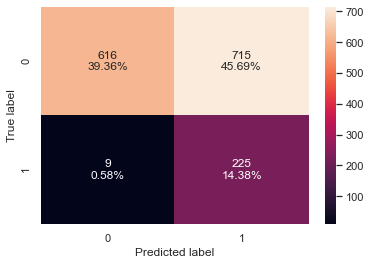

<IPython.core.display.Javascript object>

In [45]:
# Calculating different metrics on train set
xgboost_random_train = model_performance_classification_sklearn(
    xgb_tuned2, X_train, y_train
)
print("Training performance:")
print(xgboost_random_train)

print("*************************************")


# creating confusion matrix
confusion_matrix_sklearn(xgb_tuned2, X_train, y_train)

####  Observations
- The parameters obtained from both grid search and random search are approximately same
- The performance of both the models is also very similar
- Tuning with grid search took a significantly longer time

###  Comparing all models 

In [46]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        Adaboost_grid_train.T,
        Adaboost_random_train.T,
        xgboost_grid_train.T,
        xgboost_random_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "AdaBoost Tuned with Grid search",
    "AdaBoost Tuned with Random search",
    "Xgboost Tuned with Grid search",
    "Xgboost Tuned with Random Search",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,AdaBoost Tuned with Grid search,AdaBoost Tuned with Random search,Xgboost Tuned with Grid search,Xgboost Tuned with Random Search
Accuracy,0.985,0.992,0.548,0.537
Recall,0.932,0.979,0.957,0.962
Precision,0.969,0.966,0.243,0.239
F1,0.950,0.972,0.388,0.383


<IPython.core.display.Javascript object>

####  Observations 
- On comparing CV scores and the training score, xgboost model tuned using Random search is giving the better results. 

Since, Adaboost model is overfitting, we will go ahead with XGB.


Let's check the model's performance on test set and then see the feature importance from the tuned xgboost model

###  Performance on the test set

In [47]:
# Calculating different metrics on the test set
xgboost_grid_test = model_performance_classification_sklearn(xgb_tuned1, X_test, y_test)
print("Test performance:")
xgboost_grid_test

Test performance:


,Accuracy,Recall,Precision,F1
0,0.551,0.880,0.233,0.368


<IPython.core.display.Javascript object>

- The recall on the train set is more than 80%, precision and accuracy is still low. 

### Feature Importance Using Sklearn 

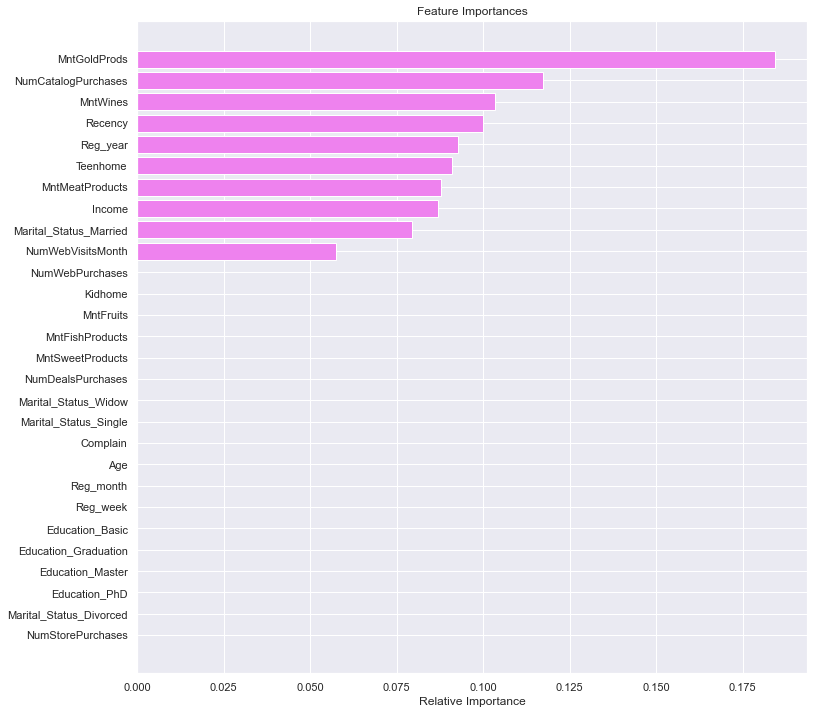

<IPython.core.display.Javascript object>

In [48]:
feature_names = X.columns
importances = xgb_tuned1.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

####  Observations 
- Amount spent on gold products is the most important feature, followed by NumCatalogPurchases and MntWines.

Let's try new package "SHAP" to explore the contribution of features in making the prediction

###   SHAP (SHapley Additive exPlanations) 

* SHAP stands for SHapley Additive exPlanations.
* SHAP makes the sophisticated machine learning models easy to understand.
* We need to be sure of what our model is actually predicting, for that we have to take a closer look at each variable and SHAP open up the possibilities to explore which variables were intensely used by the model to make predictions. 
* It is a great tool to that tell us how each feature in the model has contributing to the predictions. 
* It helps in visualizing the relationships in the model


Let's implement SHAP

#### Installing shap

In [68]:
# Install library using
# In jupyter notebook
# !pip install shap

# or
# In anaconda command prompt
# conda install -c conda-forge shap - in conda prompt

<IPython.core.display.Javascript object>

#### Import the package

In [50]:
import shap

<IPython.core.display.Javascript object>

In [51]:
## Initialize the package
shap.initjs()

<IPython.core.display.Javascript object>

#### Calculating the shap values

In [52]:
explainer = shap.TreeExplainer(xgb_tuned1)
shap_values = explainer.shap_values(X)

<IPython.core.display.Javascript object>

###   Shap summary plot 
- The Y-axis indicates the variable names, arranged in order of importance from top to bottom.
- The X-axis indicates the Shap value.
- For every variable, the dot represents an observation
- The color represents the value of the feature from low to high.
- The farther away from the values from the central line(SHAP = 0), the more impact that variable will have on predictions

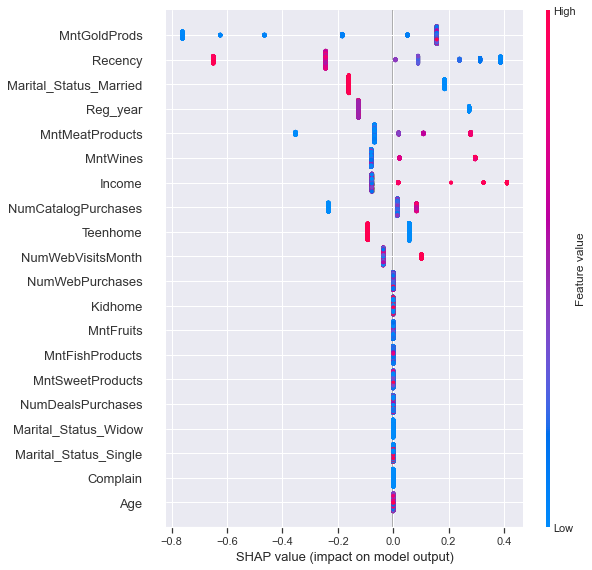

<IPython.core.display.Javascript object>

In [53]:
# Make plot.
shap.summary_plot(shap_values, X)

#### <span style="color:blue">  Observations </span>
* MntGoldProds Recency and Married status are the top three important features that contributes in the prediction of target. 
* Recency and married status have high negative impact on the response as higher the values of Recency and married status, lower the chances of accepting the offer.
* MntGoldProds have positive impact on the Response i.e lower the value of MntGoldProds, lower the chances of accepting the offer. 

#### Let's look at one specific observation to get deeper insights

###  Force Plot 
- Force plot can be informative in understanding the contribution of each variable in the prediction of a given observation. 
- The output f(x) is the score predicted by the model for a given observation. 
- Higher scores lead the model to make the predictions closer to 1 and low scores make the predictions closer to 0
- Features in red color influence positively i.e make the predictions closer to 1, whereas blue color influence negatively. 
- Base value is the mean prediction value by the model. 
- Features that had more impact on the score are located closer to the dividing boundary between red and blue. 
- The impact of each feature is represented by the size of the bar. 



In [54]:
### Exploring an individual observation
shap.force_plot(explainer.expected_value, shap_values[1, :], X.iloc[1, :])

<IPython.core.display.Javascript object>

#####   Observations 
- The model predicts 1.02 score for the given observation (the index value(1) defined in force_plot())
- Recency, MntGoldProds, Marital_Status_Married, and Teenhome has a positive impact on the prediction i.e influences the model to predict the score close to 1 
- Reg_year, MntWines, and Income have a negative impact on the prediction i.e influences the model to predict the score close to 0. 

###  Pipelines for productionizing the model 

- Pipeline is a means of automating the machine learning workflow by enabling data to be transformed and correlated into a model that can then be analyzed to achieve outputs. This type of ML pipeline makes the process of inputting data into the ML model fully automated. 

- Now, we have a final model. let's use pipelines to put the model into production


###   Column Transformer 
* We know that we can use pipelines to standardize the model building, but the steps in a pipeline are applied to each and every variable - how can we personalize the pipeline to perform different processing on different columns
* Column transformer allows different columns or column subsets of the input to be transformed separately and the features generated by each transformer will be concatenated to form a single feature space. This is useful for heterogeneous or columnar data, to combine several feature extraction mechanisms or transformations into a single transformer.


We will create 2 different pipelines, one for numerical columns and one for categorical columns. For numerical columns, we will do missing value imputation as pre-processing. For categorical columns, we will do one hot encoding and missing value imputation as pre-processing
We are doing missing value imputation for the whole data, so that if there is any missing value in the data in future that can be taken care of.

In [55]:
# creating a list of numerical variables
numerical_features = [
    "Income",
    "Kidhome",
    "Teenhome",
    "Recency",
    "MntWines",
    "MntFruits",
    "MntMeatProducts",
    "MntFishProducts",
    "MntSweetProducts",
    "MntGoldProds",
    "NumDealsPurchases",
    "NumWebPurchases",
    "NumCatalogPurchases",
    "NumStorePurchases",
    "NumWebVisitsMonth",
    "Complain",
    "Age",
    "Reg_year",
    "Reg_month",
    "Reg_week",
]

# creating a transformer for numerical variables, which will apply simple imputer on the numerical variables
numeric_transformer = Pipeline(steps=[("imputer", SimpleImputer(strategy="median"))])


# creating a list of categorical variables
categorical_features = ["Education", "Marital_Status"]

# creating a transformer for categorical variables, which will first apply simple imputer and 
#then do one hot encoding for categorical variables
categorical_transformer = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("onehot", OneHotEncoder(handle_unknown="ignore")),
    ]
)
# handle_unknown = "ignore", allows model to handle any unknown category in the test data

# combining categorical transformer and numerical transformer using a column transformer

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numerical_features),
        ("cat", categorical_transformer, categorical_features),
    ],
    remainder="passthrough",
)
# remainder = "passthrough" has been used, it will allow variables that are present in original data 
# but not in "numerical_columns" and "categorical_columns" to pass through the column transformer without any changes


<IPython.core.display.Javascript object>

In [56]:
# Separating target variable and other variables
X = data1.drop(columns="Response")
Y = data1["Response"]

<IPython.core.display.Javascript object>

- Now we already know the best model we need to process with, so we don't need to divide data into 3 sets - train, validation and test

In [57]:
# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1, stratify=Y
)
print(X_train.shape, X_test.shape)

(1565, 22) (672, 22)


<IPython.core.display.Javascript object>

In [58]:
# Creating new pipeline with best parameters
model = Pipeline(
    steps=[
        ("pre", preprocessor),
        (
            "XGB",
            XGBClassifier(
                random_state=1,
                n_estimators=50,
                scale_pos_weight=10,
                subsample=1,
                learning_rate=0.05,
                gamma=0,
                eval_metric="logloss",
                reg_lambda=10,
                max_depth=1,
            ),
        ),
    ]
)
# Fit the model on training data
model.fit(X_train, y_train)

Pipeline(steps=[('pre',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['Income', 'Kidhome',
                                                   'Teenhome', 'Recency',
                                                   'MntWines', 'MntFruits',
                                                   'MntMeatProducts',
                                                   'MntFishProducts',
                                                   'MntSweetProducts',
                                                   'MntGoldProds',
                                                   'NumDealsPurchases',
                                                   'NumWebPurchases',
                                   

<IPython.core.display.Javascript object>

In [59]:
# transforming and predicting on test data
model.predict(X_test)

array([0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,

<IPython.core.display.Javascript object>

### Business Recommendations 

- Company should target customers who buy premium products - gold products or high-quality wines - as these customers can spend more and are more likely to purchase the offer. The company should further launch premium offers for such customers. Such offers can also be extended to customers with higher income. 
- We observed in our analysis that ~64% of customers are married but single customers, including divorced and widowed, are more equally or more likely to take the offer. The company should expand its customers by customizing offers to attract more single customers.
- Customers who are frequent buyers, should be targeted more by the company and offer them added benefits.
- Total amount spent has decreased over the years which shows that either our product qualities have declined or the company lacks marketing strategies. The company should constantly improve its marketing strategies to address such issues.
- Our analysis showed that ~99% of customers had no complaints in the last two years which can be due to the lack of feedback options for customers. The company should create easy mechanisms to gather feedback from the customers and use it to identify major concerns if any.
- The number of web visits is an important feature and the company should work on customizing its website to allow more traffic on the website. The company can improve the interface and provide easy check-in, check-out and delivery options.

### Note: The next section consist Additional data processing steps into the pipeline. The additional part can be covered during the session if time permits. 

##   Additional 

#### Pipeline Incuding data processing steps

##  Function Transformer 

* Function transformer is an Sklearn processing package. 
* It is a user-defined function that provides the standard methods of Sklearn like .fit() or .transform()
* With function transformer, it becomes very easy to combine multiple processing steps and execute in a pipeline. 
* Function transformers can customize the functions to allow .fit() and .transform() method that can be used efficiently in the pipeline object. 

 



We need to import function transformer before using it and that has been imported in the very first package import section

**Steps involved in Implementation of Function Transformer**

* `Step 1` : Import the package from Sklearn using the following command - 
                 from sklearn.preprocessing import FunctionTransformer
* `Step 2` : Create a user-defined function that includes the processing steps. 
* `Step 3` : Pass the user-defined function as an argument in the FunctionTransformer() 
            Eg, processing = FunctionTransformer(myProcessingSteps)
* `Steps 4`: Define the transformer in the pipeline steps as a tuple. 
           Eg, Pipe = Pipeline (steps=[ ("data_processing", processing)]) 


In [60]:
# let's create a copy of the original data
df_market = jmd.copy()

<IPython.core.display.Javascript object>

In [61]:
## We need to drop the Age >100 from the data
df_market["Age"] = 2016 - pd.to_datetime(df_market["Year_Birth"], format="%Y").apply(
    lambda x: x.year
)
df_market.drop(df_market[df_market["Age"] > 100].index, inplace=True)

<IPython.core.display.Javascript object>

#### Splitting the data into train and test

In [62]:
# Separating target variable and other variables
X = df_market.drop(columns="Response")
Y = df_market["Response"]

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1, stratify=Y
)
print(X_train.shape, X_test.shape)

(1565, 22) (672, 22)


<IPython.core.display.Javascript object>

###   Define a function to be used in FunctionTransformer 

We need to define a function that takes a dataframe as an argument and we will include all the data processing steps into the function. The function will return a dataframe.  
We will include all the data processing steps in a function

In [63]:
def myProcessingSteps(df):
    # The feature Dt_Customer represents dates of the customer’s enrollment with the company.
    # Let's convert this to DateTime format
    df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"])

    # Extracting registration year from the date
    df["Reg_year"] = df["Dt_Customer"].apply(lambda x: x.year)

    # Extracting registration quarter from the date
    df["Reg_quarter"] = df["Dt_Customer"].apply(lambda x: x.quarter)

    # Extracting registration month from the date
    df["Reg_month"] = df["Dt_Customer"].apply(lambda x: x.month)

    # Extracting registration week from the date
    df["Reg_week"] = df["Dt_Customer"].apply(lambda x: x.day // 7)
    # Calculating the total amount spent
    df["Total_Amount_Spent"] = df[
        [
            "MntWines",
            "MntFruits",
            "MntMeatProducts",
            "MntFishProducts",
            "MntSweetProducts",
            "MntGoldProds",
        ]
    ].sum(axis=1)
    # Replacing the values in Education column
    df["Education"].replace({"2n Cycle": "Master"}, inplace=True)
    # Replacing the values in Marital status column
    df["Marital_Status"].replace(
        {
            "Together": "Married",
            "YOLO": "Single",
            "Alone": "Single",
            "Absurd": "Single",
        },
        inplace=True,
    )
    # Dropping the columns that are not required.
    df.drop(
        columns=["Year_Birth", "Dt_Customer", "Reg_quarter", "Total_Amount_Spent"],
        inplace=True,
        axis=1,
    )

    return df

<IPython.core.display.Javascript object>

##### Handling Numerical and categorical features

In [64]:
# Numerical Features
numerical_features = [
    "Income",
    "Kidhome",
    "Teenhome",
    "Recency",
    "MntWines",
    "MntFruits",
    "MntMeatProducts",
    "MntFishProducts",
    "MntSweetProducts",
    "MntGoldProds",
    "NumDealsPurchases",
    "NumWebPurchases",
    "NumCatalogPurchases",
    "NumStorePurchases",
    "NumWebVisitsMonth",
    "Complain",
    "Age",
    "Reg_year",
    "Reg_month",
    "Reg_week",
]


# Categorical Features
categorical_features = ["Education", "Marital_Status"]



<IPython.core.display.Javascript object>

### Create a column transformer

In [65]:
# column transformer
imputation_encoding = ColumnTransformer(
    [
        ("imputing_num", SimpleImputer(strategy="median"), numerical_features),
        ("encoding_cat", OneHotEncoder(handle_unknown="ignore"), categorical_features),
    ],
    remainder="passthrough",
)

<IPython.core.display.Javascript object>

###  Define FunctionTransformer 

In [66]:
# The function created for processing the data should be passed as an arugument in the FunctionTransformer
processing = FunctionTransformer(myProcessingSteps)

<IPython.core.display.Javascript object>

In [67]:
# Creating new pipeline with best parameters
pipe = Pipeline(
    steps=[
        ("data_processing", processing),
        ("imputation_encoding", imputation_encoding),
        (
            "AdaBoost",
            AdaBoostClassifier(
                n_estimators=20,
                learning_rate=1,
                base_estimator=DecisionTreeClassifier(max_depth=3, random_state=1),
            ),
        ),
    ]
)

# # Fit the model on training data
pipe.fit(X_train, y_train)

Pipeline(steps=[('data_processing',
                 FunctionTransformer(func=<function myProcessingSteps at 0x000002599D4BCCA0>)),
                ('imputation_encoding',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('imputing_num',
                                                  SimpleImputer(strategy='median'),
                                                  ['Income', 'Kidhome',
                                                   'Teenhome', 'Recency',
                                                   'MntWines', 'MntFruits',
                                                   'MntMeatProducts',
                                                   'MntFishProducts',
                                                   'MntSweetPro...
                                                   'NumWebPurchases',
                                                   'NumCatalogPurchases',
                                             

<IPython.core.display.Javascript object>

#  Happy Learning! 